In [44]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer

import seaborn as sns

In [45]:
df= pd.read_csv('/Users/saravindnaidu/Desktop/MuSigma /Problem statement 1_dataset/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [46]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [47]:
df['salary'].value_counts()

 <=50K    24720
 >50K      7841
Name: salary, dtype: int64

In [48]:
df.drop(df[df['occupation'] == ' ?'].index, inplace = True)

/Users/saravindnaidu/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='count'>

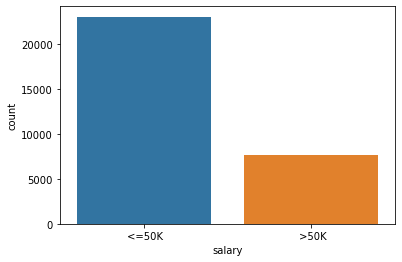

In [49]:
sns.countplot(df['salary'])

In [50]:
df_labels = pd.get_dummies(df['salary'])[' <=50K']
y = np.array(df_labels)

In [51]:
df.drop(['salary'], axis = 1, inplace = True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [52]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2)

In [53]:

cat_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country']
num_features = ['age', 'fnlwgt', 'eduIneuron@1`cation-num', 'capital-gain', 'capital-loss', 'hours-per-week']


pipeline = ColumnTransformer([('num', StandardScaler(), num_features),
                             ('cat', OneHotEncoder(handle_unknown = 'ignore'), cat_features)])

x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

In [54]:
rf = RandomForestClassifier()

rf_trained = rf.fit(x_train , y_train)
x_pred = rf_trained.predict(x_test)

In [55]:
print(accuracy_score(y_test , x_pred))
print(classification_report(y_test , x_pred))

0.8557942708333334
              precision    recall  f1-score   support

           0       0.72      0.65      0.68      1456
           1       0.89      0.92      0.91      4688

    accuracy                           0.86      6144
   macro avg       0.81      0.78      0.79      6144
weighted avg       0.85      0.86      0.85      6144



In [58]:
rf = RandomForestClassifier()

parameters = {"max_depth": [1,2,3,6],
              "max_features": [1, 3,5],
              "min_samples_split": [2, 3, 10],
                "min_samples_leaf": [1, 3, 10],
                "bootstrap": [False],
                "n_estimators" :[10, 50, 100],
                "criterion": ["gini"]}

model_tunning = GridSearchCV(rf, param_grid=parameters, cv = 3, scoring='f1_weighted', n_jobs = 4, verbose = 1)

rf_tune=model_tunning.fit(x_train , y_train)

rf_best_feat = rf_tune.best_estimator_

print(model_tunning.best_score_)
print(model_tunning.best_params_)


Fitting 3 folds for each of 324 candidates, totalling 972 fits
0.7971821685461883
{'bootstrap': False, 'criterion': 'gini', 'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}


In [59]:
x_pred = rf_best_feat.predict(x_test)
print(accuracy_score(y_test , x_pred))
print(classification_report(y_test , x_pred))

0.8271484375
              precision    recall  f1-score   support

           0       0.79      0.37      0.50      1456
           1       0.83      0.97      0.90      4688

    accuracy                           0.83      6144
   macro avg       0.81      0.67      0.70      6144
weighted avg       0.82      0.83      0.80      6144



# xgb

In [60]:
xgb = XGBClassifier()

parameters = {
        'estimator__min_child_weight': [1, 5, 10],
        'estimator__gamma': [0.5, 1, 1.5, 2, 5],
        'estimator__subsample': [0.6, 0.8, 1.0],
        'estimator__colsample_bytree': [0.6, 0.8, 1.0],
        'estimator__max_depth': [3, 4, 5]
        }


model_tunning = GridSearchCV(xgb, param_grid=parameters, cv = 3, 
                             scoring='f1_weighted', n_jobs = 4, verbose = 1)

xgb_tune =model_tunning.fit(x_train , y_train)

xgb_best = xgb_tune.best_estimator_

print(model_tunning.best_score_)
print(model_tunning.best_params_)

Fitting 3 folds for each of 405 candidates, totalling 1215 fits
[16:54:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "estimator__colsample_bytree", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:54:20] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "estimator__colsample_bytree", "estimator__gamma", "estimator__max_depth", "estimator__min_child_weight", "estimator__subsample" } might not be used.

  This could be a false alarm, with some parameters getting used by lang

In [62]:
x_pred = xgb_best.predict(x_test)
print(accuracy_score(y_test , x_pred))
print(classification_report(y_test , x_pred))

0.87109375
              precision    recall  f1-score   support

           0       0.76      0.67      0.71      1456
           1       0.90      0.93      0.92      4688

    accuracy                           0.87      6144
   macro avg       0.83      0.80      0.81      6144
weighted avg       0.87      0.87      0.87      6144

